# **Exploratory Data Analysis and Visualization(EDAV)     22ADC31N**

# **📊 Anime and Manga : Rating Popularity and Trend Analysis** 

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wd

In [2]:
# Importing datasets
anime = pd.read_csv("anime.csv")
manga = pd.read_csv("manga.csv")


## **Step 1: Data Cleaning and Handling**

## Question 1. What is the Shapes of Anime and Manga datasets?

In [3]:
# Shapes of Anime and Manga datasets 

print("Shapes of datasets before dropping columns:\n")
print(" Anime Dataset Shape:", anime.shape)
print(" Manga Dataset Shape:", manga.shape)

print("Anime Columns:", anime.columns.tolist())
print("Manga Columns:", manga.columns.tolist())


Shapes of datasets before dropping columns:

 Anime Dataset Shape: (12294, 7)
 Manga Dataset Shape: (42269, 5)
Anime Columns: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']
Manga Columns: ['title', 'year', 'tags', 'tagged_description', 'isbn13']


In [4]:
# Checking missing values 

def missing_report(df):
    return df.isna().sum().sort_values(ascending=False)

print("Missing values in Anime:")
print(missing_report(anime))
print("\nMissing values in Manga:")
print(missing_report(manga))

Missing values in Anime:
rating      230
genre        62
type         25
name          0
anime_id      0
episodes      0
members       0
dtype: int64

Missing values in Manga:
tagged_description    32
isbn13                22
title                  0
tags                   0
year                   0
dtype: int64


In [5]:
# Shapes and columns of Anime and Manga datasets dropping useless columns

print("Shapes of datasets after dropping columns:\n")
anime=anime.drop(columns=['anime_id'],errors="ignore")
manga = manga.drop(columns=["tagged_description", "isbn13"], errors="ignore").copy()
print("Anime Columns:", anime.columns.tolist())
print("Manga Columns:", manga.columns.tolist())
print(" Anime Dataset Shape:", anime.shape)
print(" Manga Dataset Shape:", manga.shape)

# Converting 'rating' , 'members' and 'episodes' columns to numbers

for col in ["rating", "members", "episodes"]:
    if col in anime.columns:
        anime[col] = pd.to_numeric(anime[col], errors="coerce")



Shapes of datasets after dropping columns:

Anime Columns: ['name', 'genre', 'type', 'episodes', 'rating', 'members']
Manga Columns: ['title', 'year', 'tags']
 Anime Dataset Shape: (12294, 6)
 Manga Dataset Shape: (42269, 3)


In [6]:
# Filling unknown episodes with median

if "episodes" in anime.columns:
    eps_med = np.nanmedian(anime["episodes"].values) if anime["episodes"].notna().any() else 0
    anime["episodes"] = anime["episodes"].fillna(eps_med)

#Converting 'type' and 'genre' columns to string 
anime["type"] = anime["type"].astype("string").str.strip().fillna("Unknown")
anime["genre"] = anime["genre"].astype("string").str.strip().fillna("Unknown")

# Filling missing ratings with median
anime_rating_med=np.nanmedian(anime["rating"].values) if anime["rating"].notna().any() else 0
anime['rating']=anime["rating"].fillna(anime_rating_med)
anime.head()

,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [7]:
# Cleaning of manga dataset

# Renaming cols for better readability
manga = manga.rename(columns={
    "title": "name",
    "tags": "genre"
})

# Droping duplicates based on name + year 

manga = manga.drop_duplicates(subset=["name", "year"])

# Converting 'year' column to numbers
manga["year"] = pd.to_numeric(manga["year"], errors="coerce")

# Remove rows with completely missing title
manga = manga.dropna(subset=["name"], how="all")

# Ensure genre column is a proper string 
manga["genre"] = manga["genre"].astype("string").str.strip()
print(manga.head())

# Replacing 0 with mean year in Manga 

# Calculating mean of column year in Manga
mean_year = manga[manga['year'] != 0]['year'].mean()
manga['year'] = manga['year'].astype(int)
manga['year'] = manga['year'].replace(0, mean_year)

                                              name  year  \
0                          The Master of Diabolism  2017   
1  JoJo's Bizarre Adventure Part 7: Steel Ball Run  2004   
2                              A Sign of Affection  2019   
3                             Moriarty the Patriot  2016   
4             Classroom of the Elite (Light Novel)  2015   

                                               genre  
0  ['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...  
1  ['Action', 'Adventure', 'Horror', 'Mystery', '...  
2  ['Romance', 'Shoujo', 'Slice of Life', 'Disabi...  
3  ['Mystery', 'Shounen', 'Detectives', 'England'...  
4  ['Comedy', 'Drama', 'Ecchi', 'Harem', 'Light N...  


In [8]:
# Checking missing values 

def missing_report(df):
    return df.isna().sum().sort_values(ascending=False)

print("Missing values in Anime:")
print(missing_report(anime))
print("\nMissing values in Manga:")
print(missing_report(manga))

Missing values in Anime:
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Missing values in Manga:
name     0
year     0
genre    0
dtype: int64


## **Step 2: DATA EXPLORATION**

In [9]:
# Checking shape of anime and manga

print("Anime dataset shape:", anime.shape)
print("Manga dataset shape:", manga.shape)

# Top rows of anime and manga

print("\nFirst 10 rows of Anime:")
display(anime.head(10))

print("\nFirst 10 rows of Manga:")
display(manga.head(10))

Anime dataset shape: (12294, 6)
Manga dataset shape: (42267, 3)

First 10 rows of Anime:


,name,genre,type,episodes,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10.0,9.15,93351
6,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148.0,9.13,425855
7,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110.0,9.11,80679
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1.0,9.10,72534
9,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13.0,9.11,81109



First 10 rows of Manga:


,name,year,genre
0,The Master of Diabolism,2017.0,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu..."
1,JoJo's Bizarre Adventure Part 7: Steel Ball Run,2004.0,"['Action', 'Adventure', 'Horror', 'Mystery', '..."
2,A Sign of Affection,2019.0,"['Romance', 'Shoujo', 'Slice of Life', 'Disabi..."
3,Moriarty the Patriot,2016.0,"['Mystery', 'Shounen', 'Detectives', 'England'..."
4,Classroom of the Elite (Light Novel),2015.0,"['Comedy', 'Drama', 'Ecchi', 'Harem', 'Light N..."
5,Who Made Me a Princess,2017.0,"['Fantasy', 'Manhwa', 'Romance', 'Slice of Lif..."
6,Demon Slayer: Kimetsu no Yaiba,2016.0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa..."
7,Omniscient Reader (Novel),2018.0,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
8,Omniscient Reader,2020.0,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
9,Yotsuba&!,2003.0,"['Comedy', 'Shounen', 'Slice of Life', 'Iyashi..."


## Question 2. How many Anime are rated above the overall average?

In [10]:
# Calculate mean rating of Anime

mean_rating = np.mean(anime["rating"])
print("Mean rating of Anime:", mean_rating)

# Boolean filter: rating > mean
above_avg_anime = anime[anime["rating"] > mean_rating]

# Show count
print("Number of Anime above average rating:", len(above_avg_anime)," out of ",len(anime["rating"]))

# Preview a few rows
above_avg_anime[["name", "rating", "members"]].head(10)

Mean rating of Anime: 6.47569952822515
Number of Anime above average rating: 6757  out of  12294


,name,rating,members
0,Kimi no Na wa.,9.37,200630
1,Fullmetal Alchemist: Brotherhood,9.26,793665
2,Gintama°,9.25,114262
3,Steins;Gate,9.17,673572
4,Gintama&#039;,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15,93351
6,Hunter x Hunter (2011),9.13,425855
7,Ginga Eiyuu Densetsu,9.11,80679
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10,72534
9,Gintama&#039;: Enchousen,9.11,81109


In [11]:
# Manga: (no rating column, so slicing by year instead)

top10_manga = manga.sort_values(by="year", ascending=False).head(10)
print("\nMost Recent 10 Manga (by Year):")
top10_manga[["name", "genre", "year"]]


Most Recent 10 Manga (by Year):


,name,genre,year
41346,Kyou mo Ikitete Erai! Amaama Kanpeki Bishoujo ...,"['Comedy', 'Drama', 'Ecchi', 'Light Novels']",2022.0
41579,Succubus to Hajimeru Shinkenkousai,"['Comedy', 'Romance', 'Shounen', 'Succubus', '...",2022.0
41484,"Tai Zi, Ni Hao Tian","['Adventure', 'Fantasy', 'Manhua', 'Romance', ...",2022.0
41347,Ryuu Taikou no Senzoku Jijo wa Goenryoshitai! ...,"['Fantasy', 'Light Novels', 'Mystery', 'Person...",2022.0
42213,"Shun-chan, Kotchi Muite!","['BL', 'Yaoi']",2022.0
6539,Absolute Hypnosis in Another World,"['Harem', 'Manhwa', 'Webtoons', 'Borderline H'...",2022.0
42255,Nigoru Hitomi de Nani wo Negau: Highserk Senki,"['Action', 'Fantasy', 'Shounen', 'Based on a L...",2022.0
42226,How the Count's Young Lady Tames the Emperor's...,"['Drama', 'Fantasy', 'Manhwa', 'Romance', 'Web...",2022.0
42247,Jisui Danshi to Joshikousei (Light Novel),"['Comedy', 'Light Novels', 'Romance', 'Slice o...",2022.0
7466,I Am Being Chased by My Husband,"['Fantasy', 'Manhwa', 'One Shot', 'Romance', '...",2022.0


## **Step 3: Aggregation & Grouping**

In [12]:

# Group by Type (Only Anime, because Manga has no 'type')

anime_type_avg = anime.groupby("type")[["rating", "members"]].mean().sort_values("rating", ascending=False)
print("Average rating & members by Anime type:\n", anime_type_avg, "\n")

Average rating & members by Anime type:
            rating       members
type                           
TV       6.892120  42683.658305
Unknown  6.570000   6537.400000
Special  6.523640   7676.060859
OVA      6.376750   5986.139837
Movie    6.323531  10360.340716
ONA      5.653141   4114.030349
Music    5.588996   1311.840164 



In [13]:
# Anime: mean rating and members per genre
anime_genre_avg = anime.groupby("genre")[["rating", "members"]].mean().sort_values("rating", ascending=False)
print("Anime genres by avg rating & popularity:\n", anime_genre_avg.head(10))

# Manga: No rating, just popularity
if "rating" in manga.columns:
    manga_genre_avg = manga.groupby("genre")[["rating"]].mean().sort_values("rating", ascending=False)
else:
    manga_genre_avg = manga["genre"].value_counts()
print("Manga genres summary:\n", manga_genre_avg.head(10))


Anime genres by avg rating & popularity:
                                                     rating   members
genre                                                               
Action, Adventure, Drama, Fantasy, Magic, Milit...    9.26  793665.0
Drama, Fantasy, Romance, Slice of Life, Superna...    9.06  456749.0
Drama, School, Shounen                                9.05  102733.0
Adventure, Drama, Supernatural                        8.93  466254.0
Drama, Music, Romance, School, Shounen                8.92  416397.0
Action, Mecha, Military, School, Sci-Fi, Super ...    8.83  715151.0
Action, Drama, Historical, Martial Arts, Romanc...    8.83  129307.0
Comedy, Mystery, Romance, School, Sci-Fi, Super...    8.81  240297.0
Comedy, Mystery, Romance, Supernatural, Vampire       8.80  205959.0
Comedy, Drama, School, Shounen, Slice of Life         8.77  268487.0
Manga genres summary:
 genre
['Josei', 'Romance', 'Harlequin', 'Based on a Novel']        473
['BL', 'Yaoi']                      

In [14]:
# Most common genres (Anime & Manga)

# Anime genres
anime['genre_list'] = anime['genre'].str.split(', ')
anime_genre_counts = anime['genre_list'].explode().value_counts()
print("Common Individual Anime Genres:")
print(anime_genre_counts)

Common Individual Anime Genres:
genre_list
Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1712
Kids             1609
Romance          1464
Slice of Life    1220
School           1220
Hentai           1141
Supernatural     1037
Mecha             944
Music             860
Historical        806
Magic             778
Ecchi             637
Shoujo            603
Seinen            547
Sports            543
Mystery           495
Super Power       465
Military          426
Parody            408
Space             381
Horror            369
Harem             317
Demons            294
Martial Arts      265
Dementia          240
Psychological     229
Police            197
Game              181
Samurai           148
Vampire           102
Thriller           87
Cars               72
Shounen Ai         65
Unknown            62
Shoujo Ai          55
Josei              54
Yuri               42
Yaoi       

In [15]:
# Manga genres

manga['genre_list'] = manga['genre'].str.strip("[]").str.replace("'", "").str.split(', ')
manga_genre_counts = manga['genre_list'].explode().value_counts()
print("Common Individual Manga Genres:")
print(manga_genre_counts)

Common Individual Manga Genres:
genre_list
Romance                    20736
Drama                      13749
Comedy                     12874
Fantasy                    10409
BL                          9037
                           ...  
Football                       2
Dodgeball                      2
VTubers                        2
Based on a Picture Book        1
Promotional                    1
Name: count, Length: 578, dtype: int64


## **Step 4: Visualizations**

## Question 3. What are the top 10 highest-rated Anime titles? (Bar Plot)

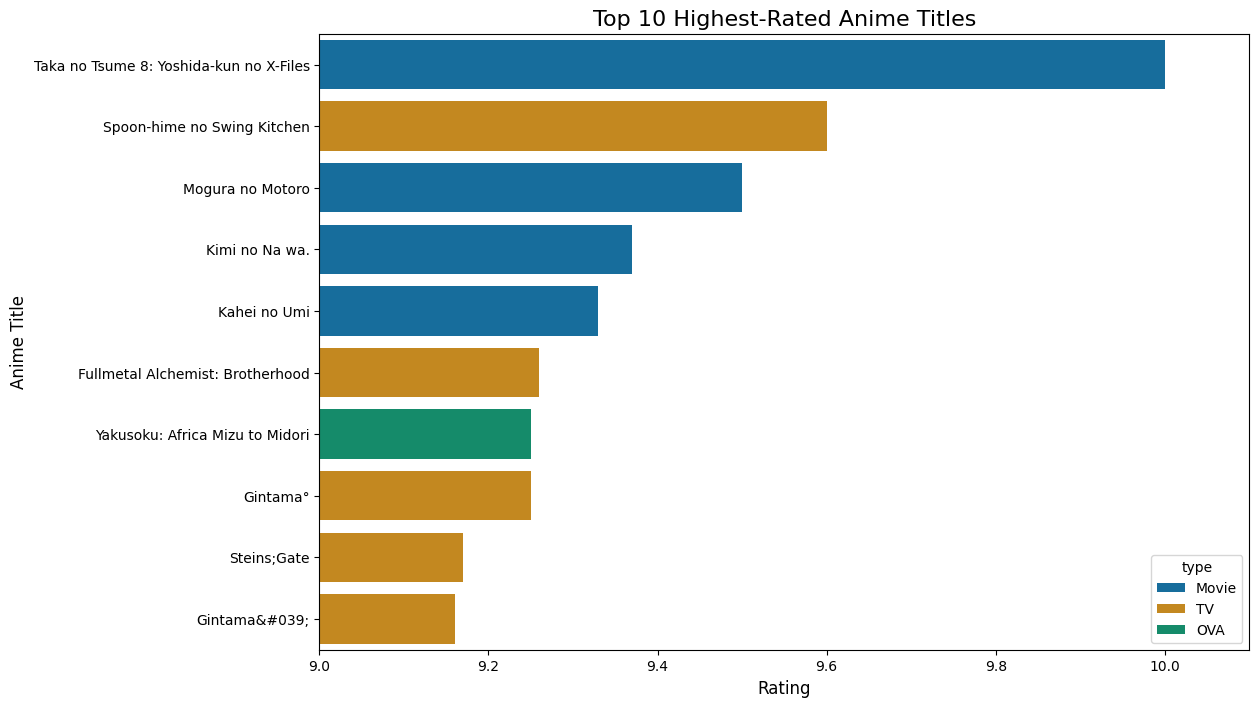

In [16]:
# Highest rated anime titles(Bar plot) 

top_10_rated_anime = anime.sort_values(by='rating', ascending=False).head(10)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='name', data=top_10_rated_anime, palette='colorblind', hue='type', legend=True)
plt.title('Top 10 Highest-Rated Anime Titles', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Anime Title', fontsize=12)
plt.xlim(9, 10.1)
plt.show()

## Question 4. Which Anime types (TV, Movie, OVA, etc.) have the highest average rating? (Box Plot)

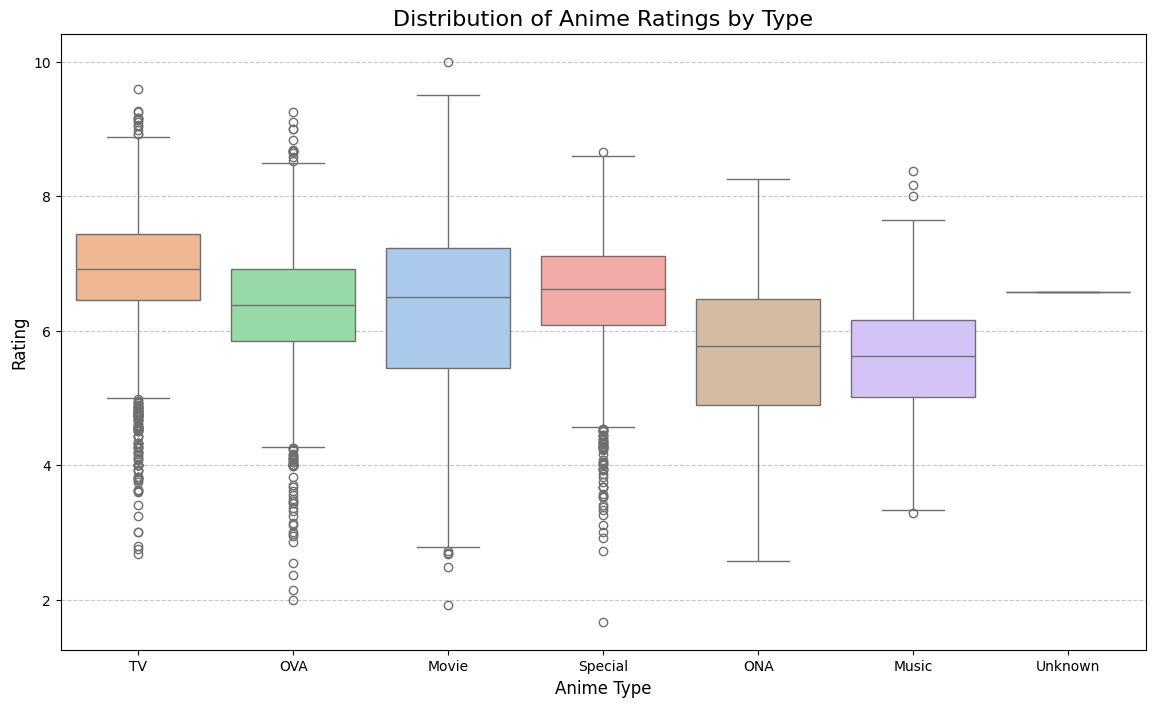

In [17]:
# Anime types (TV, Movie, OVA, etc.) have the highest average rating(Box Plot) 

plt.figure(figsize=(14, 8))
type_order = anime['type'].value_counts().index
sns.boxplot(x='type', y='rating', data=anime, palette='pastel', order=type_order, hue='type', legend=False)
plt.title('Distribution of Anime Ratings by Type', fontsize=16)
plt.xlabel('Anime Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Question 5. What are the most frequent Anime and Manga genres? (Bar Plot)

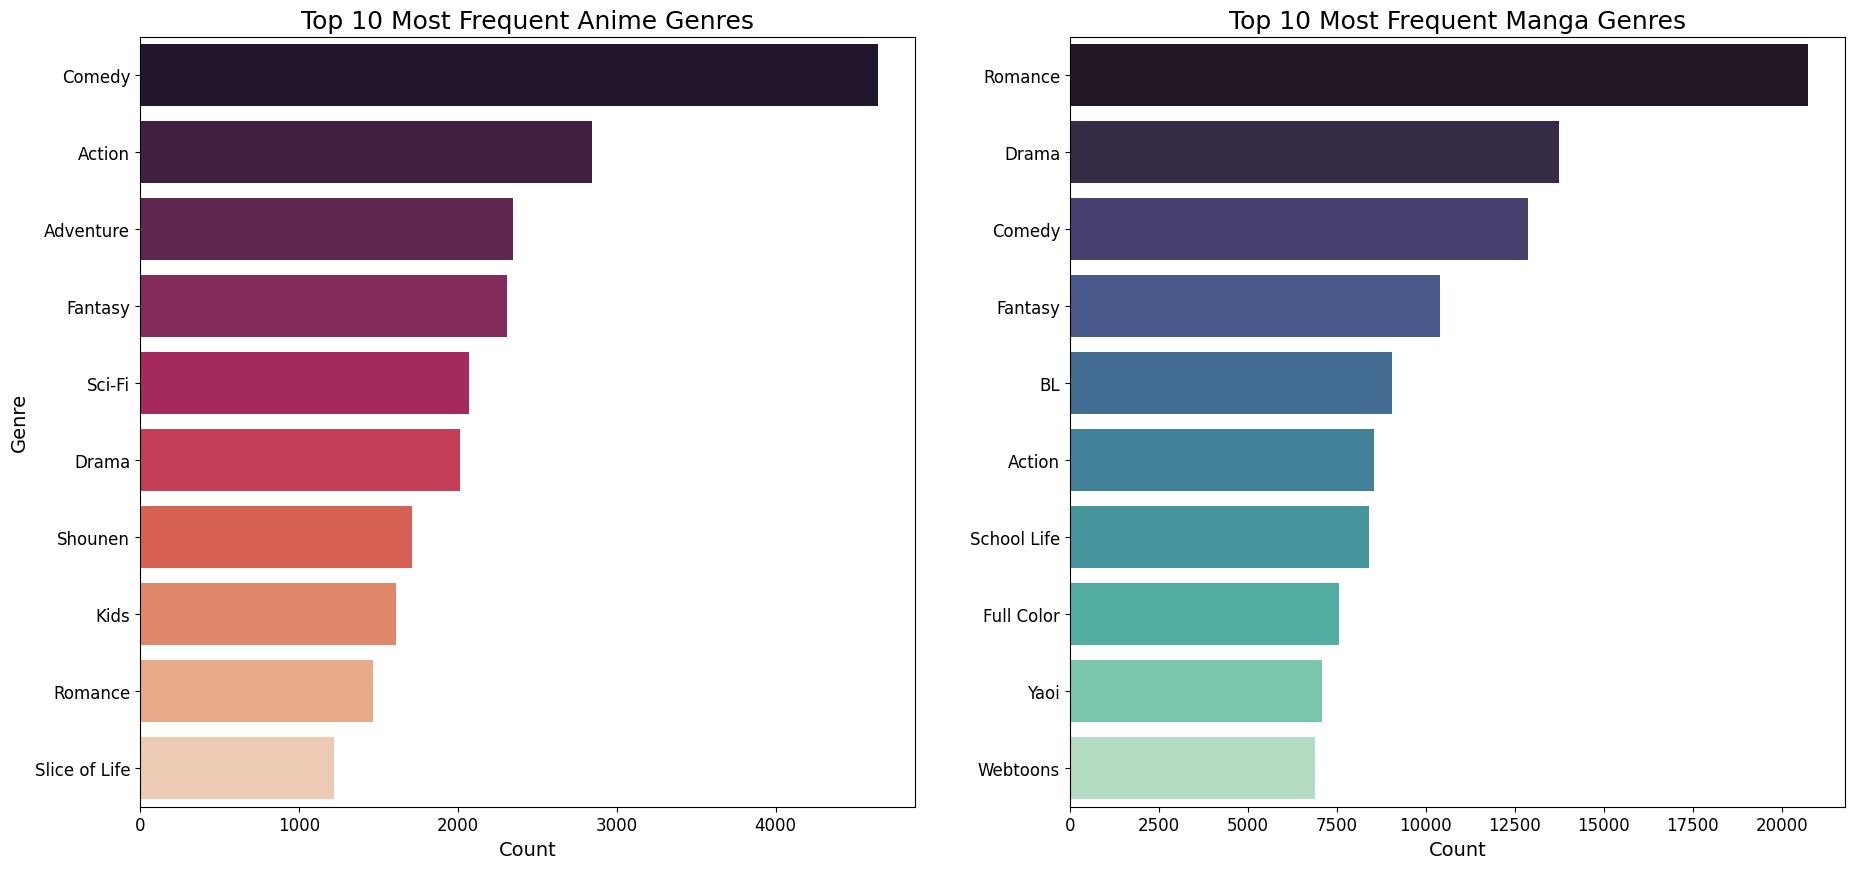

In [18]:
# Most frequent Anime and Manga genres? (Bar Plot) 

anime_genres = anime['genre'].str.split(', ').explode()
top_anime_genres = anime_genres.value_counts().nlargest(10)
manga_genres = manga['genre'].str.strip("[]").str.replace("'", "").str.split(', ').explode()
top_manga_genres = manga_genres.value_counts().nlargest(10)
# Creating sub plots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# Plot 1: Anime Genres 
sns.barplot(ax=axes[0], x=top_anime_genres.values, y=top_anime_genres.index, palette='rocket', hue=top_anime_genres.index, legend=False)
axes[0].set_title('Top 10 Most Frequent Anime Genres', fontsize=18)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Genre', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Manga Genres 
sns.barplot(ax=axes[1], x=top_manga_genres.values, y=top_manga_genres.index, palette='mako', hue=top_manga_genres.index, legend=False)
axes[1].set_title('Top 10 Most Frequent Manga Genres', fontsize=18)
axes[1].set_xlabel('Count', fontsize=14)
axes[1].set_ylabel('') 
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.show()

## Question 6. What is the distribution of Anime ratings? (Histogram + KDE Plot)

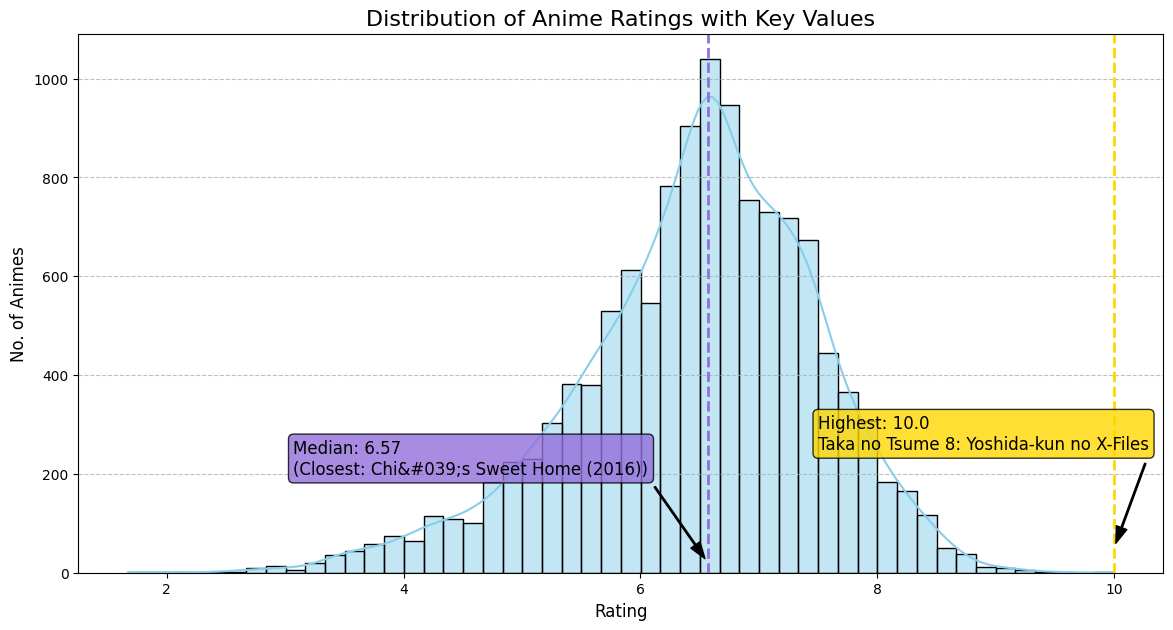

In [19]:
#  Distribution of Anime ratings (Histogram + KDE Plot)

#  Highest-rated Anime
highest_rated_anime = anime.loc[anime['rating'].idxmax()]
highest_anime_name = highest_rated_anime['name']
highest_rating = highest_rated_anime['rating']

# MEDIAN-rated Anime
median_rating = anime['rating'].median()
median_anime_index = (anime['rating'] - median_rating).abs().idxmin()
median_anime = anime.loc[median_anime_index]
median_anime_name = median_anime['name']

# Plotting
plt.figure(figsize=(14, 7))
sns.histplot(anime['rating'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Anime Ratings with Key Values', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('No. of Animes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Annotate for Highest rating Anime
plt.axvline(x=highest_rating, color='gold', linestyle='--', linewidth=2)
plt.annotate(
    f'Highest: {highest_rating}\n{highest_anime_name}',
    xy=(highest_rating, 50),
    xytext=(highest_rating - 2.5, 250),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="gold", ec="black", lw=1, alpha=0.8)
)

# Annotate for Median rated Anime
plt.axvline(x=median_rating, color='mediumpurple', linestyle='--', linewidth=2)
plt.annotate(
    f'Median: {median_rating:.2f}\n(Closest: {median_anime_name})',
    xy=(median_rating, 20),
    xytext=(median_rating - 3.5, 200),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="mediumpurple", ec="black", lw=1, alpha=0.8)
)
plt.show()

## Question 7. What is the distribution of Manga release years? (Histogram)

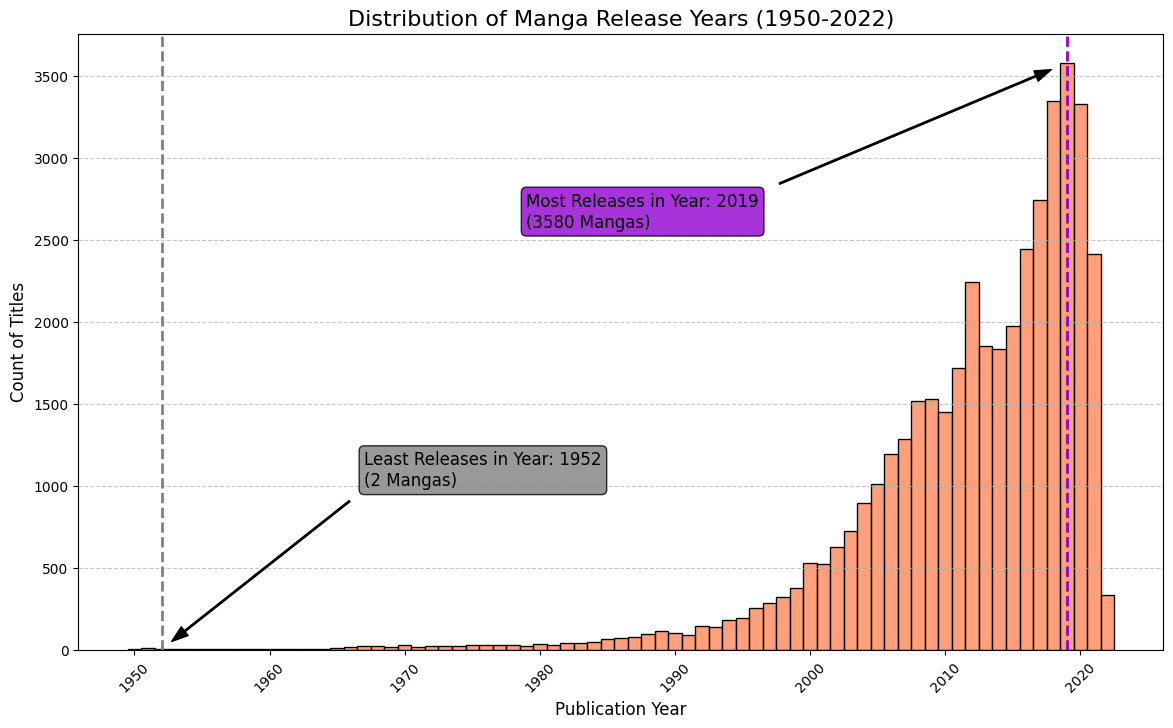

In [20]:
# Distrubition of Manga release years 

# Years with Most and Least releases
manga_filtered = manga[(manga['year'] >= 1950)].copy()
year_counts = manga_filtered['year'].value_counts()
most_releases_year = year_counts.idxmax()
most_releases_count = year_counts.max()
least_releases_year = year_counts.idxmin()
least_releases_count = year_counts.min()

# Plotting
plt.figure(figsize=(14, 8))
sns.histplot(data=manga_filtered, x='year', discrete=True, color='coral')
plt.title('Distribution of Manga Release Years (1950-2022)', fontsize=16)
plt.xlabel("Publication Year", fontsize=12)
plt.ylabel("Count of Titles", fontsize=12)
plt.xticks(np.arange(1950, 2023, 10), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Annotation for Most releases 
plt.axvline(x=most_releases_year, color='darkviolet', linestyle='--', linewidth=2)
plt.annotate(
    f'Most Releases in Year: {int(most_releases_year)}\n({most_releases_count} Mangas)',
    xy=(most_releases_year, most_releases_count), 
    xytext=(most_releases_year - 40, most_releases_count - 1000),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="darkviolet", ec="black", lw=1, alpha=0.8, color='white')
)

# Annotation for Least releases
plt.axvline(x=least_releases_year, color='gray', linestyle='--', linewidth=2)
plt.annotate(
    f'Least Releases in Year: {int(least_releases_year)}\n({least_releases_count} Mangas)',
    xy=(least_releases_year, least_releases_count),
    xytext=(least_releases_year + 15, least_releases_count + 1000),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="gray", ec="black", lw=1, alpha=0.8, color='white')
)
plt.show()

## Question 8. What is the relationship between Anime ratings and members (popularity)? (Scatter Plot)

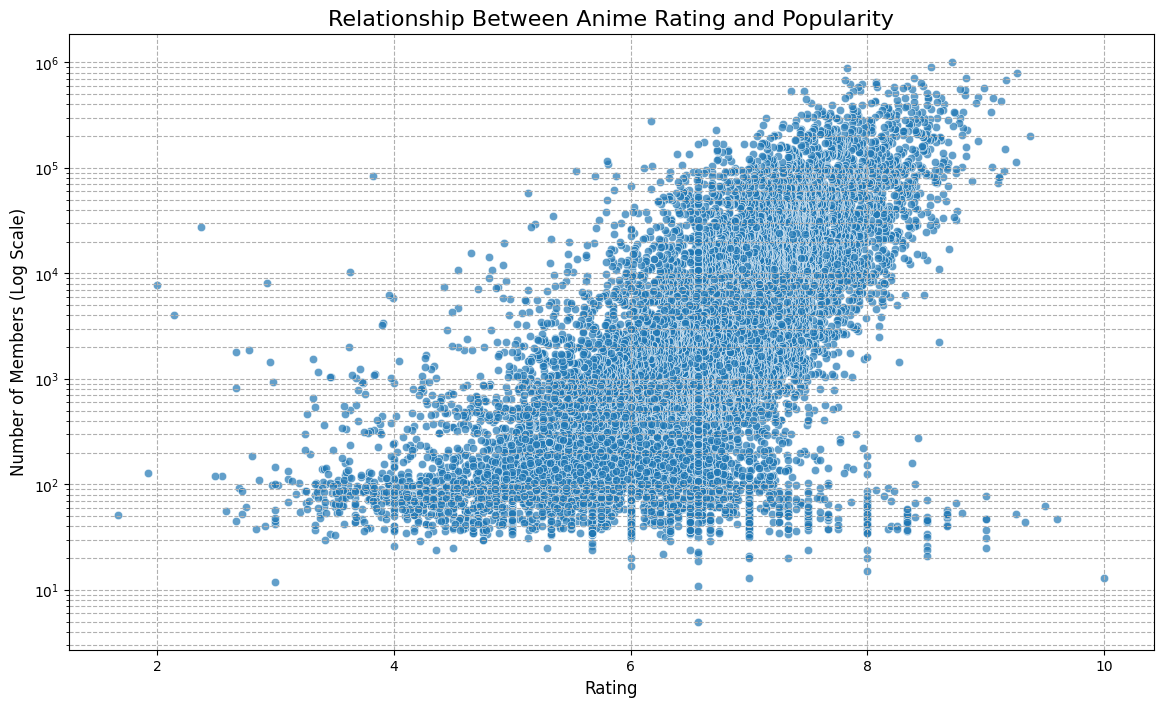

In [21]:
# Relationship between Anime ratings and members (popularity) (Scatter Plot)

plt.figure(figsize=(14, 8))
sns.scatterplot(x='rating', y='members', data=anime, alpha=0.7)
plt.yscale('log')
plt.title('Relationship Between Anime Rating and Popularity', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Members (Log Scale)', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.show()

## Question 9. What are the top 10 Manga by year of release? (Bar Plot)

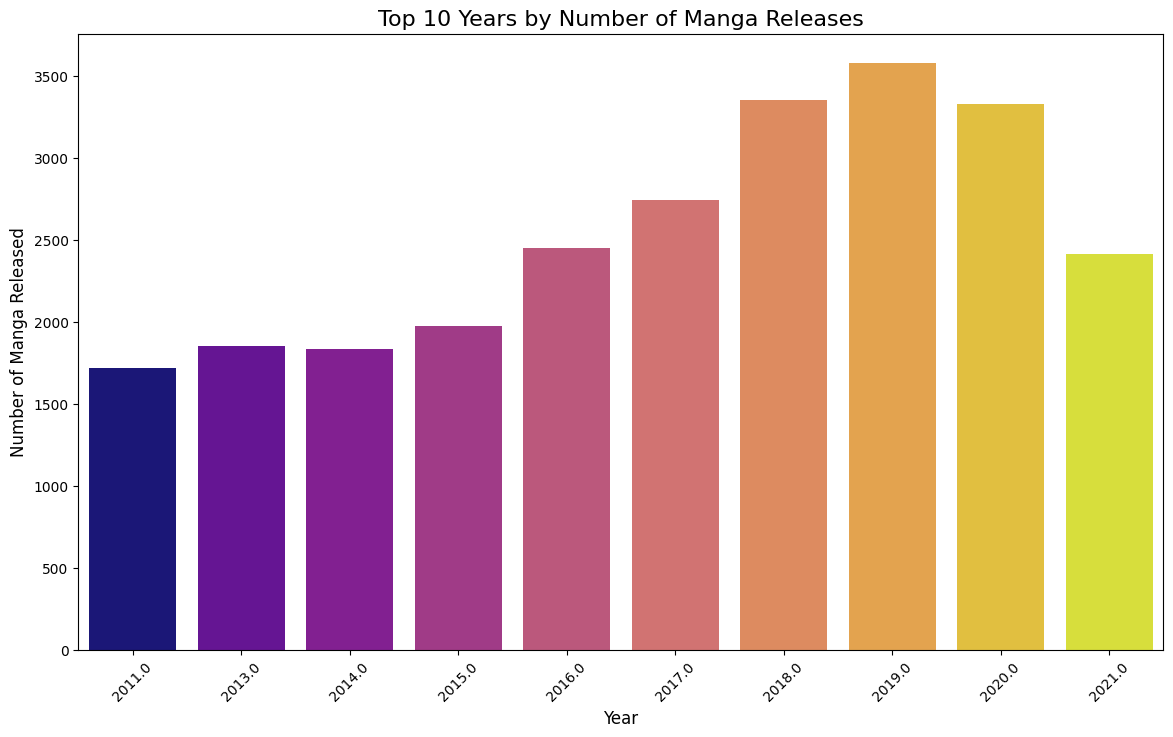

In [22]:
# Top 10 Manga by year of release (Bar Plot) 

top_10_years = manga['year'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='plasma', hue=top_10_years.index, legend=False)
plt.title('Top 10 Years by Number of Manga Releases', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Manga Released', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Question 10. What correlations exist among Anime numeric features like rating, members, and episodes? (Heatmap)

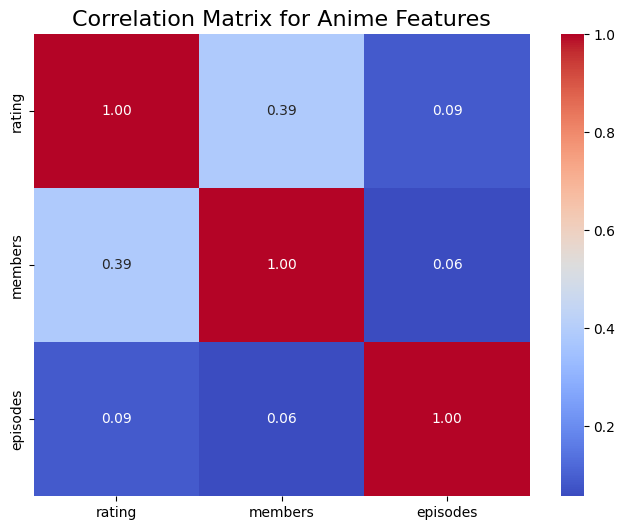

In [23]:
# Correlations among Anime Rating, Members and Episodes(Heatmap) 

anime_numeric = anime[['rating', 'members', 'episodes']].copy()
anime_numeric['episodes'] = pd.to_numeric(anime_numeric['episodes'], errors='coerce')
anime_numeric.dropna(inplace=True)
correlation_matrix = anime_numeric.corr()

# Plotting

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap='coolwarm',
    fmt='.2f'        
)
plt.title('Correlation Matrix for Anime Features', fontsize=16)
plt.show()

## Question 11. What is genre frequency in both Anime and Manga? (Pie chart)

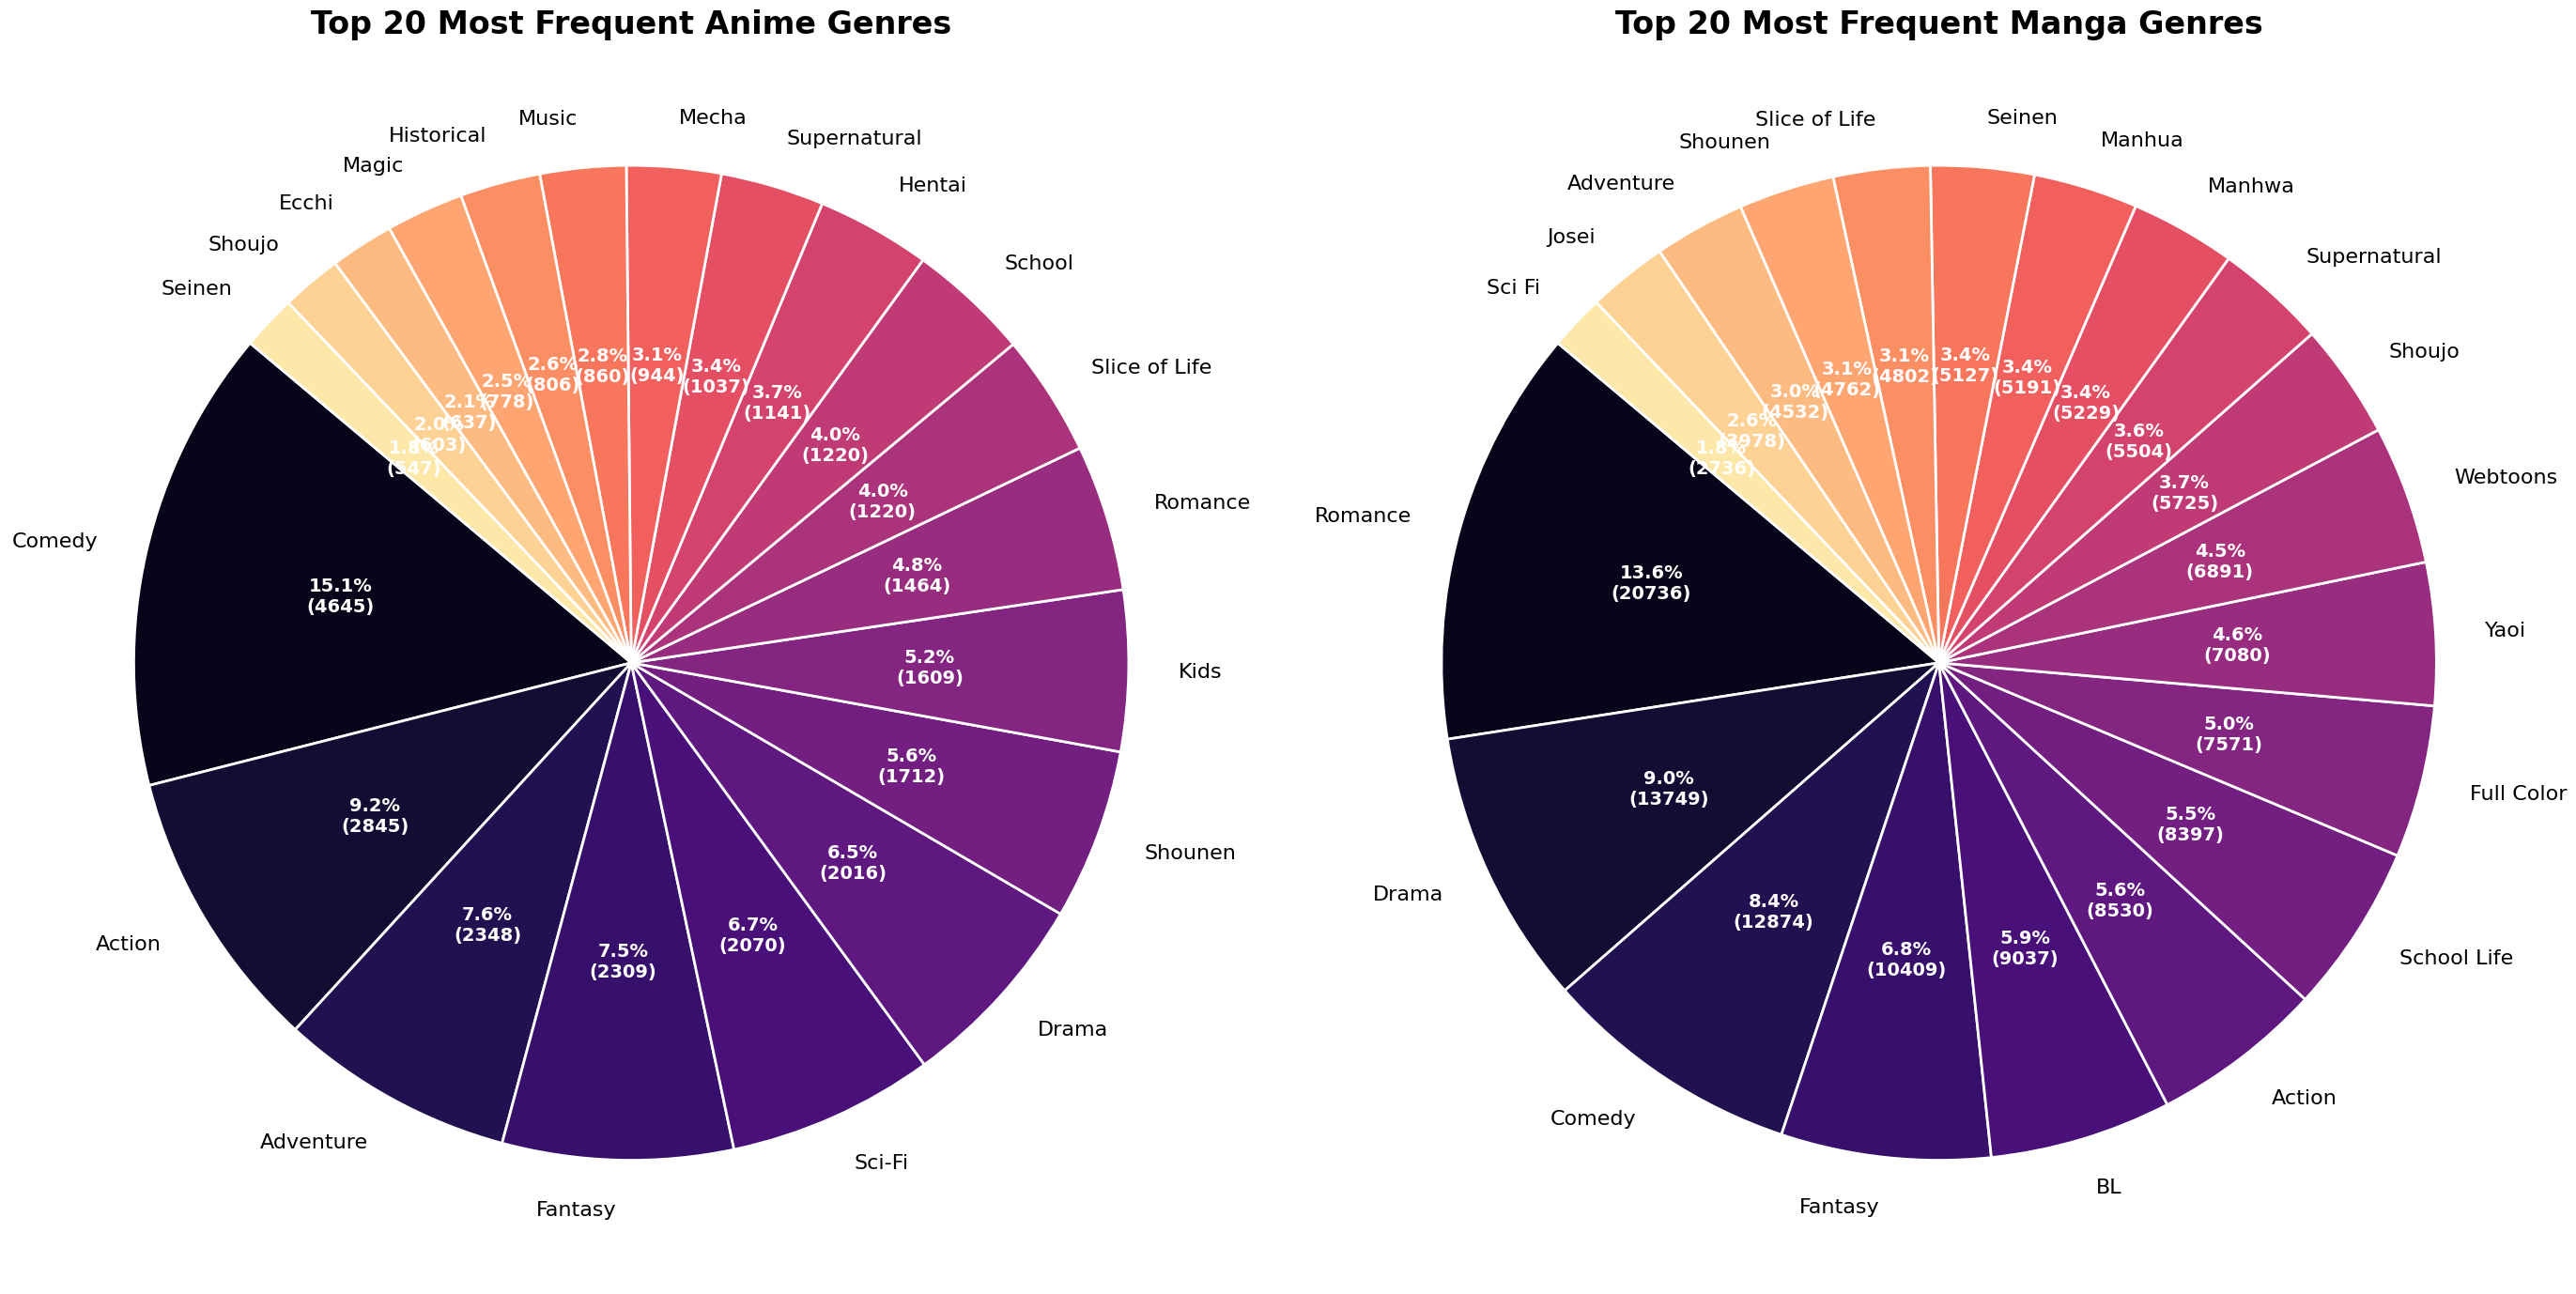

In [24]:
# Process and get the top 20 anime genres

top_anime_genres = anime['genre'].str.split(', ').explode().value_counts().nlargest(20)

# Process and get the top 20 manga genres

top_manga_genres = manga['genre'].str.strip("[]").str.replace("'", "").str.split(', ').explode().value_counts().nlargest(20)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(28, 14))
colors = sns.color_palette('magma', len(top_anime_genres))

# Custom function for autopct to make text bold and white
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Plot 1: Anime Genres
wedges, texts, autotexts = axes[0].pie(top_anime_genres, labels=top_anime_genres.index, autopct=autopct_format(top_anime_genres),
                                      startangle=140, colors=colors,
                                      textprops={'fontsize': 16, 'color': "black"},
                                      wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
axes[0].set_title('Top 20 Most Frequent Anime Genres', fontsize=24, fontweight='bold')
plt.setp(autotexts, size=14, weight="bold", color="white")

# Plot 2: Manga Genres
wedges, texts, autotexts = axes[1].pie(top_manga_genres, labels=top_manga_genres.index, autopct=autopct_format(top_manga_genres),
                                      startangle=140, colors=colors,
                                      textprops={'fontsize': 16, 'color': "black"},
                                      wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
axes[1].set_title('Top 20 Most Frequent Manga Genres', fontsize=24, fontweight='bold')
plt.setp(autotexts, size=14, weight="bold", color="white")

plt.tight_layout()
plt.show()

## Question 12. Which genres dominate Anime and Manga overall? (Word Clouds)

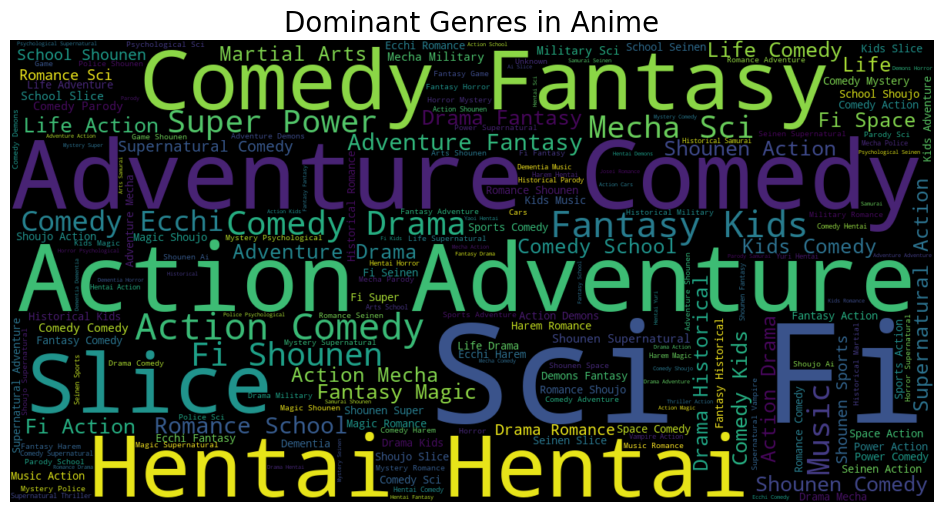

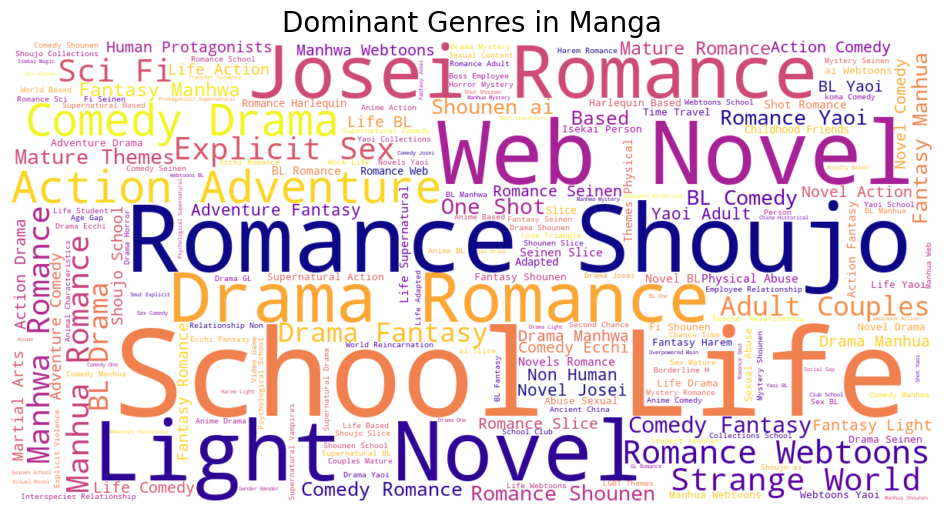

In [32]:
# Genres dominating Anime and Manga (Word Clouds) 

# 1. Anime
anime_genre_text = ' '.join(anime['genre'].str.split(', ').explode().dropna())
wordcloud = wd.WordCloud(
    width=1200,
    height=600,
    background_color='black',
    colormap='viridis',
    random_state=25
).generate(anime_genre_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Dominant Genres in Anime', fontsize=20)
plt.show()

# 2. Manga
manga_genre_text = ' '.join(manga['genre'].str.strip("[]").str.replace("'", "").str.split(', ').explode().dropna().loc[lambda genre: genre != 'Full Color'])
wordcloud =wd. WordCloud(
    width=1200,
    height=600,
    background_color='white', 
    colormap='plasma',
    random_state=12
).generate(manga_genre_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dominant Genres in Manga', fontsize=20)
plt.show()

## **Step 5: Statistical Operations**

In [33]:
# Meam and std of Anime Ratings and Members

anime_ratings = anime['rating'].dropna().to_numpy()
anime_members = anime['members'].dropna().to_numpy()

print("Anime Ratings → Mean:", np.mean(anime_ratings), 
      "Median:", np.median(anime_ratings), 
      "Std:", np.std(anime_ratings))

print("Anime Members → Mean:", np.mean(anime_members), 
      "Median:", np.median(anime_members), 
      "Std:", np.std(anime_members))

# Correlation matrix for Anime ratings and memebers

corr = np.corrcoef(anime_ratings, anime_members)
print("Correlation between rating & members:\n", corr)


Anime Ratings → Mean: 6.47569952822515 Median: 6.57 Std: 1.0171378043327601
Anime Members → Mean: 18071.33886448674 Median: 1550.0 Std: 54818.44730916939
Correlation between rating & members:
 [[1.         0.38713959]
 [0.38713959 1.        ]]


## Question 13. What are the key statistical measures for Anime and Manga?

In [34]:
#  Key statistical measures for Anime and Manga 

anime_stats = anime[['rating', 'members']]
print("Key Statistical Features for Anime:")
print(anime_stats.describe())

manga_stats= manga[['year']]
print("\nKey Statistical Features for Manga:")
print(manga_stats.describe())

Key Statistical Features for Anime:
             rating       members
count  12294.000000  1.229400e+04
mean       6.475700  1.807134e+04
std        1.017179  5.482068e+04
min        1.670000  5.000000e+00
25%        5.900000  2.250000e+02
50%        6.570000  1.550000e+03
75%        7.170000  9.437000e+03
max       10.000000  1.013917e+06

Key Statistical Features for Manga:
               year
count  42267.000000
mean    2011.883630
std        8.657309
min     1926.000000
25%     2008.000000
50%     2014.000000
75%     2018.000000
max     2022.000000


## Question 14. What are the top 5 Anime and Manga identified using NumPy operations?

In [35]:
# Anime → top 5 by rating

top5_anime_idx = np.argsort(anime_ratings)[-5:][::-1]
top5_anime = anime.iloc[top5_anime_idx][['name', 'rating']]
print("\nTop 5 Anime by Rating:\n", top5_anime)

# Manga → top 5 by year 
manga_years =manga['year'].dropna().to_numpy()
top5_manga_idx = np.argsort(manga_years)[-5:][::-1]
top5_manga = manga.iloc[top5_manga_idx][['name', 'year']]
print("\nTop 5 Manga by Year:\n", top5_manga)




Top 5 Anime by Rating:
                                           name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33

Top 5 Manga by Year:
                                                     name    year
41491  Tsuihou Sareta Tenshou Juu Kishi wa Game Chish...  2022.0
42255     Nigoru Hitomi de Nani wo Negau: Highserk Senki  2022.0
41969                                    Señorita Cometa  2022.0
41968                         Stay 5 Meters Away From Me  2022.0
42245  Karasu to Reijou: Inou Sekai Saikyou no Mondai...  2022.0


## **Step 6: Recommendation System**

In [36]:
def recommendation_system():
    if 'genre_list' not in anime.columns:
        anime['genre_list'] = anime['genre'].str.split(', ')
    if 'genre_list' not in manga.columns:
        if 'tags' in manga.columns and 'genre' not in manga.columns:
            manga.rename(columns={'tags': 'genre'}, inplace=True)
        manga['genre_list'] = manga['genre'].str.strip("[]").str.replace("'", "").str.split(', ')

    media_type = input("Which do you want to be recommended: anime or manga? ").lower().strip()

    # ANIME RECOMMENDATION
    
    if media_type == "anime":
        all_genres = sorted(anime['genre_list'].explode().dropna().unique())
        print(f"\nAvailable genres: {', '.join(all_genres)}")
        
        genres_input = input("Please choose one or more genres (separated by commas): ").strip()
        chosen_genres = {genre.strip().title() for genre in genres_input.split(',')}

        mask = anime['genre_list'].apply(lambda anime_genres: chosen_genres.issubset(set(anime_genres)))
        genre_filtered_anime = anime[mask]

        if genre_filtered_anime.empty:
            print("Sorry, no anime found with that combination of genres.")
            return

        try:
            min_rating = float(input("Enter minimum rating (e.g., 7.5): "))
        except ValueError:
            print("Invalid rating. Please enter a number.")
            return

        recommended_anime = genre_filtered_anime[genre_filtered_anime['rating'] >= min_rating]

        if not recommended_anime.empty:
            print(f"\nHere are the top 5 recommendations for '{', '.join(chosen_genres)}' anime, sorted by highest rating:")
            # MODIFICATION: Sort by 'rating' by default
            display(recommended_anime.sort_values(by='rating', ascending=False)[['name', 'rating', 'members', 'genre']])
        else:
            print("Sorry, no anime found matching your criteria. Try a lower rating.")

    # MANGA RECOMMENDATION
    
    elif media_type == "manga":
        all_genres = sorted(manga['genre_list'].explode().dropna().unique())
        print(f"\nAvailable genres: {', '.join(all_genres)}")

        genres_input = input("Please choose one or more genres (separated by commas): ").strip()
        chosen_genres = {genre.strip().title() for genre in genres_input.split(',')}
        
        mask = manga['genre_list'].apply(lambda manga_genres: chosen_genres.issubset(set(manga_genres)))
        genre_filtered_manga = manga[mask]

        if genre_filtered_manga.empty:
            print("Sorry, no manga found with that combination of genres.")
            return

        print(f"\nHere are up to 5 recommendations for '{', '.join(chosen_genres)}' manga, sorted by newest release year:")
        display(genre_filtered_manga.sort_values(by='year', ascending=False)[['name', 'year', 'genre']])
    else:
        print("Invalid choice. Please enter 'anime' or 'manga'.")


In [38]:
# Using Recommendation system

recommendation_system()

Which do you want to be recommended: anime or manga?  manga



Available genres: , "Valentines Day", 15th Century, 16th Century, 17th Century, 18th Century, 19th Century, 1P Comic, 4-koma, Abstract, Acting, Action, Adapted to Anime, Adult Couples, Adult Industry, Adventure, Africa, Afterlife, Age Gap, Age Transformation, Aging, Agriculture, Alcohol, Alcoholism, Alice in Wonderland, Aliens, All-Boys School, All-Girls School, America, Amnesia, Amusement Park, Ancient China, Androids, Androphobia, Angels, Animal Abuse, Animal Characteristics, Animal Protagonists, Animal Transformation, Anime Industry, Anthologies, Anthropomorphic, Apartment Life, Apocalypse, Apprenticeship, Archery, Argentina, Arranged Marriage, Art, Art School, Assassins, Astronauts, Astronomy, Australia, Autobiographies, Aviation, BDSM, BL, Badminton, Baking, Ballet Dancing, Bar, Bara, Baseball, Based on a Card Game, Based on a Cartoon, Based on a Comic Book, Based on a Doujinshi, Based on a Fairy Tale, Based on a Light Novel, Based on a Manga, Based on a Mobile Game, Based on a M

Please choose one or more genres (separated by commas):  isekai



Here are up to 5 recommendations for 'Isekai' manga, sorted by newest release year:


,name,year,genre
41279,Hitsujikai Cütte wa Isekai demo Kawaii wo Hiro...,2022.0,"['Comedy', 'Fantasy', 'Light Novels', 'Country..."
41168,I’d Rather Have a Cat than a Harem! Reincarnat...,2022.0,"['Comedy', 'Fantasy', 'Light Novels', 'Slice o..."
40458,Tenseishitara Saikyou Shu-tachi ga Sumau Shima...,2022.0,"['Action', 'Adventure', 'Comedy', 'Ecchi', 'Fa..."
41856,Zangyaku Sugiru Isekai demo Suzuki wa Kawaii (...,2022.0,"['Comedy', 'Ecchi', 'Fantasy', 'Harem', 'Horro..."
42195,Maou to Yuusha no Tatakai no Ura de (Light Novel),2022.0,"['Action', 'Drama', 'Fantasy', 'Light Novels',..."
...,...,...,...
23789,The Vision of Escaflowne,1994.0,"['Action', 'Drama', 'Fantasy', 'Mecha', 'Roman..."
8413,Magic Knight Rayearth,1993.0,"['Action', 'Adventure', 'Fantasy', 'Shoujo', '..."
7140,Fushigi Yugi,1992.0,"['Drama', 'Fantasy', 'Reverse Harem', 'Romance..."
1483,The Twelve Kingdoms (Light Novel),1992.0,"['Fantasy', 'Light Novels', 'Contemporary Fant..."


In [31]:
# Using Recommendation system

recommendation_system()

Which do you want to be recommended: anime or manga?  manga



Available genres: , "Valentines Day", 15th Century, 16th Century, 17th Century, 18th Century, 19th Century, 1P Comic, 4-koma, Abstract, Acting, Action, Adapted to Anime, Adult Couples, Adult Industry, Adventure, Africa, Afterlife, Age Gap, Age Transformation, Aging, Agriculture, Alcohol, Alcoholism, Alice in Wonderland, Aliens, All-Boys School, All-Girls School, America, Amnesia, Amusement Park, Ancient China, Androids, Androphobia, Angels, Animal Abuse, Animal Characteristics, Animal Protagonists, Animal Transformation, Anime Industry, Anthologies, Anthropomorphic, Apartment Life, Apocalypse, Apprenticeship, Archery, Argentina, Arranged Marriage, Art, Art School, Assassins, Astronauts, Astronomy, Australia, Autobiographies, Aviation, BDSM, BL, Badminton, Baking, Ballet Dancing, Bar, Bara, Baseball, Based on a Card Game, Based on a Cartoon, Based on a Comic Book, Based on a Doujinshi, Based on a Fairy Tale, Based on a Light Novel, Based on a Manga, Based on a Mobile Game, Based on a M

Please choose one or more genres (separated by commas):  reincarnation



Here are up to 5 recommendations for 'Reincarnation' manga, sorted by newest release year:


,name,year,genre
42173,The Crownless Queen,2022.0,"['Drama', 'Fantasy', 'Manhwa', 'Romance', 'Web..."
41491,Tsuihou Sareta Tenshou Juu Kishi wa Game Chish...,2022.0,"['Action', 'Adventure', 'Fantasy', 'Reincarnat..."
41928,Aku no Kadou wo Ikimashou (Light Novel),2022.0,"['Comedy', 'Fantasy', 'Light Novels', 'Romance..."
41279,Hitsujikai Cütte wa Isekai demo Kawaii wo Hiro...,2022.0,"['Comedy', 'Fantasy', 'Light Novels', 'Country..."
2632,I'm Engaged to an Obsessive Male Lead,2022.0,"['Drama', 'Fantasy', 'Manhwa', 'Romance', 'Web..."
...,...,...,...
5837,Aries,1987.0,"['Action', 'Drama', 'Fantasy', 'Romance', 'Sho..."
2049,Please Save My Earth,1987.0,"['Drama', 'Mystery', 'Romance', 'Sci Fi', 'Sho..."
31906,Umi no Aurora,1977.0,"['Romance', 'Shoujo', 'Fated Lovers', 'Reincar..."
21119,Bride of Deimos,1975.0,"['Shoujo', 'Deal with the Devil', 'Demons', 'E..."
